# Text Classification Setup and Initial Data Fetching

This section sets up the necessary libraries for text processing and machine learning. It initializes the Wikipedia API to fetch articles in English, specifying a custom user agent. Keywords are defined for two categories: medical and non-medical. These keywords are used to fetch relevant articles from Wikipedia.

# Functions for Data Handling:

- fetch_content: This function retrieves text content from Wikipedia based on the provided title. It utilizes the Wikipedia API to get the text of a page.
- clean_text: Cleans the fetched text by tokenizing, removing stopwords, and applying stemming and lemmatization. It uses NLTK's tokenization, Snowball, Porter, and WordNet Lemmatizer for text normalization. This function returns three versions of the text: stemmed, lemmatized, and snowball-stemmed.

# Data Preparation and Text Preprocessing:

The script fetches and preprocesses content for each keyword. It then structures this data into pandas DataFrames, labeling each entry as either 'medical' or 'non-medical'. This part is crucial as it compiles the dataset that will be used for training the classification models.

Feature Extraction

Two feature extraction methods are employed:
- Bag of Words (BoW): Converts text documents into numerical vectors where each word is represented by a frequency count.
- TF-IDF: Converts text to vectors based on the importance of terms relative to the document and corpus.

# Model Training and Evaluation:

Four models are trained using the features extracted:
- Naive Bayes (BoW)
- **Naive Bayes (TF-IDF)
- Logistic Regression (BoW)
- Logistic Regression (TF-IDF)

These models are evaluated on a split test set, and their performance metrics like accuracy and classification reports are generated and displayed. This comprehensive evaluation helps understand the effectiveness of each approach and model in categorizing texts into medical and non-medical categories based on the content fetched and preprocessed from Wikipedia.


In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, PorterStemmer, WordNetLemmatizer
import pandas as pd
import wikipediaapi

# Initialize Wikipedia API with user agent
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    extract_format=wikipediaapi.ExtractFormat.WIKI,
    user_agent="MyWikiApp/1.0 (abhishek.hirve97@gmail.com)"  # Customize with your email
)

# Define medical and non-medical keywords
medical_keywords = ["Healthcare", "Cardiology", "Surgery", "Wellness", "Pharmacy", "Immunology",
                    "Pathology", "Pediatrics", "Oncology", "Neurology", "Dentistry", "Vascular",
                    "Orthopedic", "Dermatology", "Endocrinology", "Gastroenterology", "Pulmonology", "Neurosurgery",
                    "Ophthalmology", "Radiology", "Anesthesiology", "Genetics", "Oncologist", "Hematology",
                    "Immunotherapy", "Pediatrician", "Psychiatry", "Dental", "Anatomy",
                    "Physiology", "Biochemistry", "Nutrition", "Disease", "Disorder", "Ailment", "Injury",
                    "Infectious", "Pandemic", "Nurse", "Doctor", "Alzheimer", "Virus", "Operation",
                    "Medical Science", "Clinical", "Therapeutic", "Remedy", "Vaccination", "Treatment",
                    "Medical Profession", "Medical Care", "Medical Treatment", "Medical Practice",
                    "Medical Examination", "Medical Diagnosis", "Medical Condition", "Medical Research", "Kidney", "Stone"]

non_medical_keywords = ["Art", "Literature", "Philosophy", "Science", "Technology", "Space",
                        "Environment", "Food", "Cuisine", "Recipes", "Cooking", "History", "Ancient_Civilizations",
                        "Archaeology", "Painting", "Sculpture", "Literary", "Fiction", "Poetry", "Philosopher",
                        "Culinary", "Gastronomy", "Recipe", "Culinary", "History", "Historical", "Architectural",
                        "Archaeological", "Civilization", "Culture", "Engineering", "Astronomy", "Cosmology", "Country", "Industry", "Ocean", "Charger", "Battery", "Music", "Dance", "Painting", "Sculpture", "Artistic", "Novel",
                        "Art", "Creative", "Imagination", "Impressionism", "Improvise", "Fictional", "Lyrical",
                        "Entertainment", "Literary Arts", "Creative Arts", "Humanities", "Social Sciences",
                        "Natural Sciences", "Fine Arts", "Visual Arts", "Performing Arts", "Musicology", "Artistry",
                        "Cultural Studies", "Historiography", "Literary Criticism", "Artistic Expression"]

# Function to fetch content from Wikipedia using wikipediaapi
def fetch_content(title, wiki_wiki):
    page_py = wiki_wiki.page(title)
    content = page_py.text
    return content

# #Function to clean text
def clean_text(text):
    tokens = word_tokenize(text.lower())
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    snowball_stemmer = SnowballStemmer('english')
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    snowball_stemmed_tokens = [snowball_stemmer.stem(token) for token in tokens]
    return stemmed_tokens, lemmatized_tokens, snowball_stemmed_tokens




# Fetch and clean content for medical keywords
medical_content_list = [fetch_content(keyword, wiki_wiki) for keyword in medical_keywords]
cleaned_medical_content_list = [" ".join(clean_text(content)[0]) for content in medical_content_list]
cleaned_lemmatized_medical_content_list = [" ".join(clean_text(content)[1]) for content in medical_content_list]
cleaned_snowball_stemmed_medical_content_list = [" ".join(clean_text(content)[2]) for content in medical_content_list]

# Fetch and clean content for non-medical keywords
non_medical_content_list = [fetch_content(keyword, wiki_wiki) for keyword in non_medical_keywords]
cleaned_non_medical_content_list = [" ".join(clean_text(content)[0]) for content in non_medical_content_list]
cleaned_lemmatized_non_medical_content_list = [" ".join(clean_text(content)[1]) for content in non_medical_content_list]
cleaned_snowball_stemmed_non_medical_content_list = [" ".join(clean_text(content)[2]) for content in non_medical_content_list]

# Create DataFrames with fetched and cleaned data
medical_data = {"text": cleaned_medical_content_list, "label": ["medical"] * len(medical_content_list)}
non_medical_data = {"text": cleaned_non_medical_content_list, "label": ["non-medical"] * len(non_medical_content_list)}
lemmatized_medical_data = {"text": cleaned_lemmatized_medical_content_list, "label": ["medical"] * len(medical_content_list)}
lemmatized_non_medical_data = {"text": cleaned_lemmatized_non_medical_content_list, "label": ["non-medical"] * len(non_medical_content_list)}
snowball_stemmed_medical_data = {"text": cleaned_snowball_stemmed_medical_content_list, "label": ["medical"] * len(medical_content_list)}
snowball_stemmed_non_medical_data = {"text": cleaned_snowball_stemmed_non_medical_content_list, "label": ["non-medical"] * len(non_medical_content_list)}

# Concatenate DataFrames and shuffle rows
df = pd.concat([pd.DataFrame(medical_data), pd.DataFrame(non_medical_data),
                pd.DataFrame(lemmatized_medical_data), pd.DataFrame(lemmatized_non_medical_data),
                pd.DataFrame(snowball_stemmed_medical_data), pd.DataFrame(snowball_stemmed_non_medical_data)], ignore_index=True)
df = df.sample(frac=1, random_state=42)

# Feature Extraction using Bag of Words
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['text'])
y = df['label']

# Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Naive Bayes Classifier (Bag of Words)
nb_bow_model = MultinomialNB()
nb_bow_model.fit(X_count, y)

# Naive Bayes Classifier (TF-IDF)
nb_tfidf_model = MultinomialNB()
nb_tfidf_model.fit(X_tfidf, y)

# Logistic Regression (Bag of Words)
lr_bow_model = LogisticRegression(max_iter=1000)
lr_bow_model.fit(X_count, y)

# Logistic Regression (TF-IDF)
lr_tfidf_model = LogisticRegression(max_iter=1000)
lr_tfidf_model.fit(X_tfidf, y)

# Evaluation
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return accuracy, report

# Splitting data for evaluation
X_count_train, X_count_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)
X_tfidf_train, X_tfidf_test, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Evaluation for Naive Bayes (Bag of Words)
nb_bow_accuracy, nb_bow_report = evaluate_model(nb_bow_model, X_count_test, y_test)

# Evaluation for Naive Bayes (TF-IDF)
nb_tfidf_accuracy, nb_tfidf_report = evaluate_model(nb_tfidf_model, X_tfidf_test, y_test)

# Evaluation for Logistic Regression (Bag of Words)
lr_bow_accuracy, lr_bow_report = evaluate_model(lr_bow_model, X_count_test, y_test)

# Evaluation for Logistic Regression (TF-IDF)
lr_tfidf_accuracy, lr_tfidf_report = evaluate_model(lr_tfidf_model, X_tfidf_test, y_test)

# Printing evaluation results
print("Naive Bayes Classifier (Bag of Words) - Accuracy:", nb_bow_accuracy)
print("Naive Bayes Classifier (Bag of Words) - Classification Report:\n", nb_bow_report)

print("\nNaive Bayes Classifier (TF-IDF) - Accuracy:", nb_tfidf_accuracy)
print("Naive Bayes Classifier (TF-IDF) - Classification Report:\n", nb_tfidf_report)

print("\nLogistic Regression (Bag of Words) - Accuracy:", lr_bow_accuracy)
print("Logistic Regression (Bag of Words) - Classification Report:\n", lr_bow_report)

print("\nLogistic Regression (TF-IDF) - Accuracy:", lr_tfidf_accuracy)
print("Logistic Regression (TF-IDF) - Classification Report:\n", lr_tfidf_report)


Naive Bayes Classifier (Bag of Words) - Accuracy: 0.96
Naive Bayes Classifier (Bag of Words) - Classification Report:
               precision    recall  f1-score   support

     medical       1.00      0.92      0.96        37
 non-medical       0.93      1.00      0.96        38

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75


Naive Bayes Classifier (TF-IDF) - Accuracy: 0.96
Naive Bayes Classifier (TF-IDF) - Classification Report:
               precision    recall  f1-score   support

     medical       1.00      0.92      0.96        37
 non-medical       0.93      1.00      0.96        38

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75


Logistic Regression (Bag of Words) - Accuracy: 0.9866666666666667
Logistic Regression (Bag of Words) - Classification 

# Visualization of Learning Curves

This section visualizes the learning curves for different classification models and feature extraction techniques. Learning curves are crucial for diagnosing bias and variance in machine learning models, helping us understand how well our models generalize to new data as the training sample size increases.

- Naive Bayes (Bag of Words): The first plot displays the learning curve for the Naive Bayes model using Bag of Words feature extraction. The graph plots training and cross-validation scores across various training sizes, providing insight into the model's performance and its evolution with increasing data.

- **Naive Bayes (TF-IDF): Similarly, the second plot illustrates the learning curve for the Naive Bayes model utilizing the TF-IDF method. This helps compare the impact of different feature extraction techniques on the same type of classifier.

- Logistic Regression (Bag of Words): The third plot presents the learning curve for the Logistic Regression model trained with Bag of Words features. It shows how logistic regression scales with data and helps identify if the model is benefiting from more training data or suffering from high variance.

- Logistic Regression (TF-IDF): Finally, the last plot visualizes the learning curve for the Logistic Regression model using TF-IDF features. Comparing this plot with the previous ones can aid in understanding which combination of model and feature extraction method yields the best performance in terms of accuracy and generalization.

Each plot is configured to display both training and cross-validation accuracy as a function of the number of training examples, which is a good indicator of learning efficiency and model robustness. The detailed legends and labels in each plot ensure clarity in interpretation of the results.


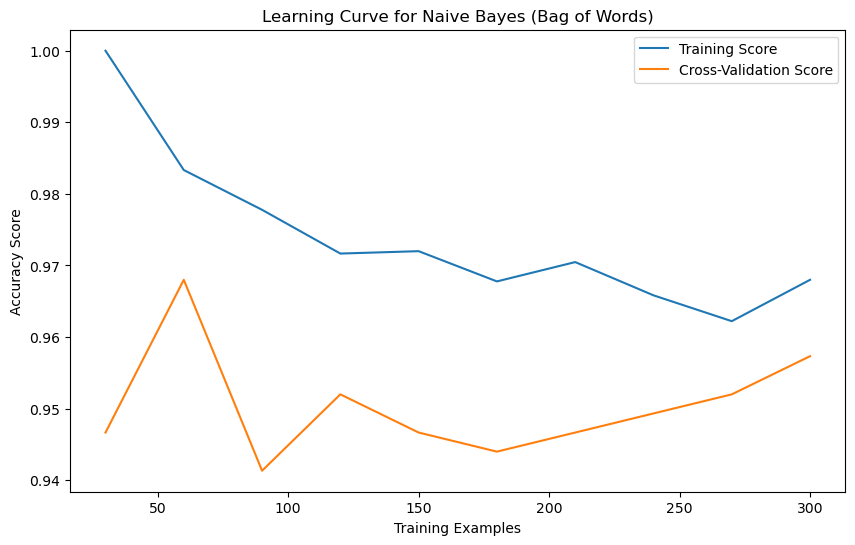

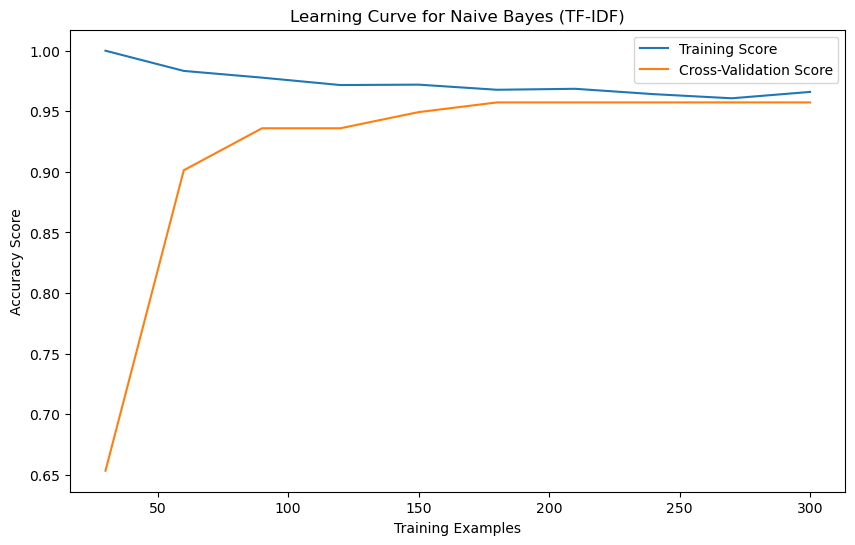

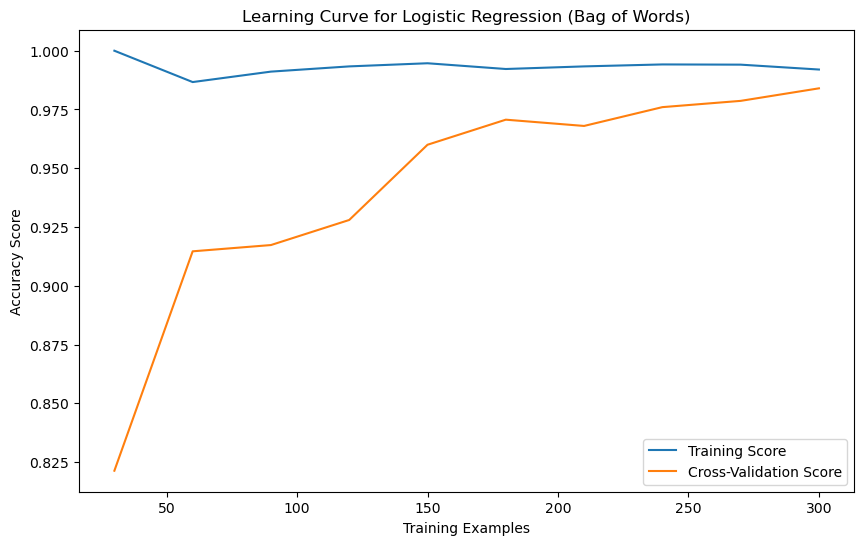

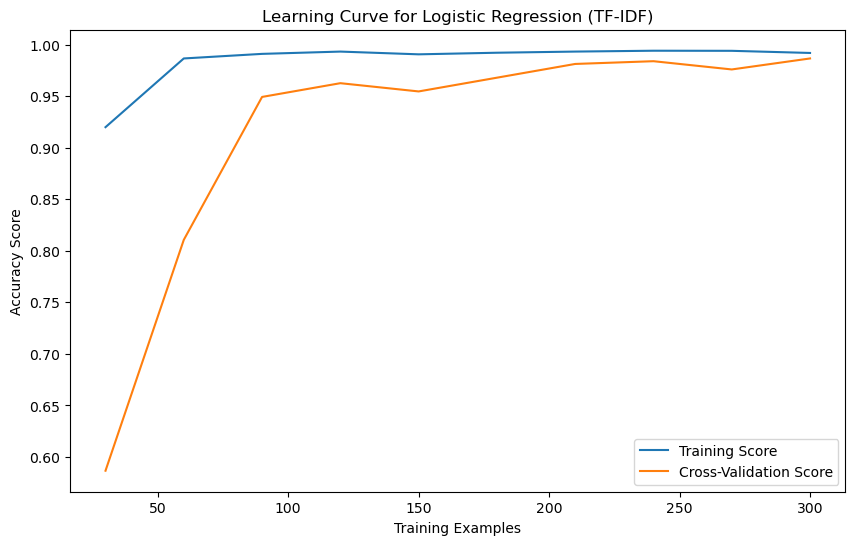

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Learning Curve for Naive Bayes (Bag of Words)
train_sizes, train_scores_nb_bow, test_scores_nb_bow = learning_curve(nb_bow_model, X_count, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores_nb_bow, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores_nb_bow, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve for Naive Bayes (Bag of Words)')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

# Learning Curve for Naive Bayes (TF-IDF)
train_sizes, train_scores_nb_tfidf, test_scores_nb_tfidf = learning_curve(nb_tfidf_model, X_tfidf, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores_nb_tfidf, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores_nb_tfidf, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve for Naive Bayes (TF-IDF)')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

# Learning Curve for Logistic Regression (Bag of Words)
train_sizes, train_scores_lr_bow, test_scores_lr_bow = learning_curve(lr_bow_model, X_count, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores_lr_bow, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores_lr_bow, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve for Logistic Regression (Bag of Words)')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

# Learning Curve for Logistic Regression (TF-IDF)
train_sizes, train_scores_lr_tfidf, test_scores_lr_tfidf = learning_curve(lr_tfidf_model, X_tfidf, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores_lr_tfidf, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores_lr_tfidf, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve for Logistic Regression (TF-IDF)')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()


# Testing with New Data

This section of the code demonstrates the process of applying the trained Naive Bayes and Logistic Regression models to make predictions on new, unseen data. The data set contains examples that vary from clear medical terms to unrelated topics:

- Example inputs include "heart disease", "India is a country", "Indian cricket", "lungs", "Brain", and a descriptive sentence about kidney stones.

# Steps Involved:

1. Data Preparation:
   - The new examples are first cleaned using the `clean_text` function, which processes the text by tokenizing, removing stopwords, and applying stemming and lemmatization techniques. This standardizes the text, making it suitable for vectorization.

2. Feature Transformation:
   - The cleaned text data is then transformed using the TF-IDF vectorizer that was fitted on the training data. This step converts the text into a numeric format that the models can process, ensuring that the new data is represented in the same feature space as the training data.

3. Model Predictions:
   - The preprocessed data is fed into both the Naive Bayes and Logistic Regression models. Each model has been trained using two different feature extraction methods: Bag of Words and TF-IDF.
   - Predictions are made for each piece of text using all four trained models (two models, each with two methods of feature extraction).

4. Output Display:
   - The predictions for each input text are displayed, showing whether the model classifies each example as 'medical' or 'non-medical'. This output helps in evaluating how well the models generalize to new data and in understanding their predictive capabilities across varied contexts.

This practical application of the models provides insight into their real-world utility and helps in assessing their performance beyond the initial testing phase conducted during the model evaluation step.


In [5]:
# # New data
# new_data = [
#     "heart disease",
#     "India is a country",
#     "Indian cricket",
#     "lungs",
#     "Brain",
#     "Kidney stones are solid deposits of minerals that can form in the kidneys"
# ]

# # Preprocess new data
# cleaned_new_data = [clean_text(data) for data in new_data]

# # Transform new data using the TF-IDF vectorizer
# new_data_tfidf = tfidf_vectorizer.transform(cleaned_new_data)

# # Predict using Naive Bayes models
# new_predictions_nb_bow = nb_bow_model.predict(new_data_tfidf)
# new_predictions_nb_tfidf = nb_tfidf_model.predict(new_data_tfidf)

# # Predict using Logistic Regression models
# new_predictions_lr_bow = lr_bow_model.predict(new_data_tfidf)
# new_predictions_lr_tfidf = lr_tfidf_model.predict(new_data_tfidf)

# # Display predictions
# print("\nPredictions on new data using Naive Bayes (Bag of Words):")
# for data, prediction in zip(new_data, new_predictions_nb_bow):
#     print(f"{data} - Predicted: {prediction}")

# print("\nPredictions on new data using Naive Bayes (TF-IDF):")
# for data, prediction in zip(new_data, new_predictions_nb_tfidf):
#     print(f"{data} - Predicted: {prediction}")

# print("\nPredictions on new data using Logistic Regression (Bag of Words):")
# for data, prediction in zip(new_data, new_predictions_lr_bow):
#     print(f"{data} - Predicted: {prediction}")

# print("\nPredictions on new data using Logistic Regression (TF-IDF):")
# for data, prediction in zip(new_data, new_predictions_lr_tfidf):
#     print(f"{data} - Predicted: {prediction}")
# New data
# New data
# New data

# Function to clean text
def clean_text(text):
    tokens = word_tokenize(text.lower())
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    snowball_stemmer = SnowballStemmer('english')
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    snowball_stemmed_tokens = [snowball_stemmer.stem(token) for token in tokens]
    return stemmed_tokens + lemmatized_tokens + snowball_stemmed_tokens
    
new_data = [
    "heart disease",
    "India is a country",
    "Indian cricket",
    "lungs",
    "Brain",
    "Kidney stones are solid deposits of minerals that can form in the kidneys"
]

# Preprocess new data
cleaned_new_data = [' '.join(clean_text(data)) for data in new_data]

# Transform new data using the TF-IDF vectorizer
new_data_tfidf = tfidf_vectorizer.transform(cleaned_new_data)

# Predict using Naive Bayes models
new_predictions_nb_bow = nb_bow_model.predict(new_data_tfidf)
new_predictions_nb_tfidf = nb_tfidf_model.predict(new_data_tfidf)

# Predict using Logistic Regression models
new_predictions_lr_bow = lr_bow_model.predict(new_data_tfidf)
new_predictions_lr_tfidf = lr_tfidf_model.predict(new_data_tfidf)

# Display predictions
print("\nPredictions on new data using Naive Bayes (Bag of Words):")
for data, prediction in zip(new_data, new_predictions_nb_bow):
    print(f"{data} - Predicted: {prediction}")

print("\nPredictions on new data using Naive Bayes (TF-IDF):")
for data, prediction in zip(new_data, new_predictions_nb_tfidf):
    print(f"{data} - Predicted: {prediction}")

print("\nPredictions on new data using Logistic Regression (Bag of Words):")
for data, prediction in zip(new_data, new_predictions_lr_bow):
    print(f"{data} - Predicted: {prediction}")

print("\nPredictions on new data using Logistic Regression (TF-IDF):")
for data, prediction in zip(new_data, new_predictions_lr_tfidf):
    print(f"{data} - Predicted: {prediction}")





Predictions on new data using Naive Bayes (Bag of Words):
heart disease - Predicted: medical
India is a country - Predicted: medical
Indian cricket - Predicted: non-medical
lungs - Predicted: medical
Brain - Predicted: medical
Kidney stones are solid deposits of minerals that can form in the kidneys - Predicted: medical

Predictions on new data using Naive Bayes (TF-IDF):
heart disease - Predicted: medical
India is a country - Predicted: non-medical
Indian cricket - Predicted: non-medical
lungs - Predicted: medical
Brain - Predicted: medical
Kidney stones are solid deposits of minerals that can form in the kidneys - Predicted: medical

Predictions on new data using Logistic Regression (Bag of Words):
heart disease - Predicted: medical
India is a country - Predicted: medical
Indian cricket - Predicted: medical
lungs - Predicted: medical
Brain - Predicted: medical
Kidney stones are solid deposits of minerals that can form in the kidneys - Predicted: medical

Predictions on new data usin

Iteration 2

# Improved version of above implementation with some fine tuning parameters and some additional implemenatationafter observing first imp0lementation and results.

In [6]:
# Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import wikipediaapi
import pandas as pd

# Wikipedia API initialization
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    extract_format=wikipediaapi.ExtractFormat.WIKI,
    user_agent="MyWikiApp/1.0 (abhishek.hirve97@gmail.com)"  
)

# Function to fetch and clean content from Wikipedia
def fetch_content(title, wiki_wiki):
    page_py = wiki_wiki.page(title)
    content = page_py.text
    return content

# Function to clean text
def clean_text(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

# Medical and non-medical keywords
medical_keywords = ["Healthcare", "Cardiology", "Surgery", "Wellness", "Pharmacy", "Immunology",
                    "Pathology", "Pediatrics", "Oncology", "Neurology", "Dentistry", "Vascular",
                    "Orthopedic", "Dermatology", "Endocrinology", "Gastroenterology", "Pulmonology", "Neurosurgery",
                    "Ophthalmology", "Radiology", "Anesthesiology", "Genetics", "Oncologist", "Hematology",
                    "Immunotherapy", "Pediatrician", "Psychiatry", "Dental", "Anatomy",
                    "Physiology", "Biochemistry", "Nutrition", "Disease", "Disorder", "Ailment", "Injury",
                    "Infectious", "Pandemic", "Nurse", "Doctor", "Alzheimer", "Virus", "Operation",
                    "Medical Science", "Clinical", "Therapeutic", "Remedy", "Vaccination", "Treatment",
                    "Medical Profession", "Medical Care", "Medical Treatment", "Medical Practice",
                    "Medical Examination", "Medical Diagnosis", "Medical Condition", "Medical Research","Kidney","Stone"]

non_medical_keywords = ["Art", "Literature", "Philosophy", "Science", "Technology", "Space",
                        "Environment", "Food", "Cuisine", "Recipes", "Cooking", "History", "Ancient_Civilizations",
                        "Archaeology", "Painting", "Sculpture", "Literary", "Fiction", "Poetry", "Philosopher",
                        "Culinary", "Gastronomy", "Recipe", "Culinary", "History", "Historical", "Architectural",
                        "Archaeological", "Civilization", "Culture", "Engineering", "Astronomy", "Cosmology", "Country", "Industry", "Ocean", "Charger", "Battery", "Music", "Dance", "Painting", "Sculpture", "Artistic", "Novel",
                        "Art", "Creative", "Imagination", "Impressionism", "Improvise", "Fictional", "Lyrical",
                        "Entertainment", "Literary Arts", "Creative Arts", "Humanities", "Social Sciences",
                        "Natural Sciences", "Fine Arts", "Visual Arts", "Performing Arts", "Musicology", "Artistry",
                        "Cultural Studies", "Historiography", "Literary Criticism", "Artistic Expression"]

# Fetching and cleaning content for medical keywords
medical_content_list = [fetch_content(keyword, wiki_wiki) for keyword in medical_keywords]
cleaned_medical_content_list = [clean_text(content) for content in medical_content_list]

# Fetching and cleaning content for non-medical keywords
non_medical_content_list = [fetch_content(keyword, wiki_wiki) for keyword in non_medical_keywords]
cleaned_non_medical_content_list = [clean_text(content) for content in non_medical_content_list]

# Creating DataFrames with fetched and cleaned data
medical_data = {"text": cleaned_medical_content_list, "label": ["medical"] * len(medical_content_list)}
non_medical_data = {"text": cleaned_non_medical_content_list, "label": ["non-medical"] * len(non_medical_content_list)}
df = pd.concat([pd.DataFrame(medical_data), pd.DataFrame(non_medical_data)], ignore_index=True)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)


# Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])
y = df['label']

# Fitting Naive Bayes Classifier
nb_tfidf_model = MultinomialNB()
nb_tfidf_model.fit(X_train, y_train)

# Predicting the test set results
nb_predictions = nb_tfidf_model.predict(X_test)

# Evaluating the Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_class_report = classification_report(y_test, nb_predictions)

print("Naive Bayes Classifier (TF-IDF) - Accuracy:", nb_accuracy)
print("Naive Bayes Classifier (TF-IDF) - Classification Report:")
print(nb_class_report)

# Fitting Logistic Regression
lr_tfidf_model = LogisticRegression(max_iter=1000)
lr_tfidf_model.fit(X_train, y_train)

# Predicting the test set results for Logistic Regression
lr_predictions = lr_tfidf_model.predict(X_test)

# Evaluating the Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_class_report = classification_report(y_test, lr_predictions)

print("Logistic Regression (TF-IDF) - Accuracy:", lr_accuracy)
print("Logistic Regression (TF-IDF) - Classification Report:")
print(lr_class_report)

Naive Bayes Classifier (TF-IDF) - Accuracy: 0.9148936170212766
Naive Bayes Classifier (TF-IDF) - Classification Report:
              precision    recall  f1-score   support

     medical       1.00      0.82      0.90        45
 non-medical       0.86      1.00      0.92        49

    accuracy                           0.91        94
   macro avg       0.93      0.91      0.91        94
weighted avg       0.93      0.91      0.91        94

Logistic Regression (TF-IDF) - Accuracy: 0.9893617021276596
Logistic Regression (TF-IDF) - Classification Report:
              precision    recall  f1-score   support

     medical       0.98      1.00      0.99        45
 non-medical       1.00      0.98      0.99        49

    accuracy                           0.99        94
   macro avg       0.99      0.99      0.99        94
weighted avg       0.99      0.99      0.99        94



#Dynamic input:
Here in this implementation we have tried to implement an chatbot like structure for our implementation as taking more han one command from user to test model.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Naive Bayes Classifier (TF-IDF) - Accuracy: 0.84375
Classification Report:               precision    recall  f1-score   support

     medical       1.00      0.72      0.84        18
 non-medical       0.74      1.00      0.85        14

    accuracy                           0.84        32
   macro avg       0.87      0.86      0.84        32
weighted avg       0.88      0.84      0.84        32

Logistic Regression (TF-IDF) - Accuracy: 0.90625
Classification Report:               precision    recall  f1-score   support

     medical       1.00      0.83      0.91        18
 non-medical       0.82      1.00      0.90        14

    accuracy                           0.91        32
   macro avg       0.91      0.92      0.91        32
weighted avg       0.92      0.91      0.91        32

Naive Bayes prediction: medical
Logistic Regression prediction: medical


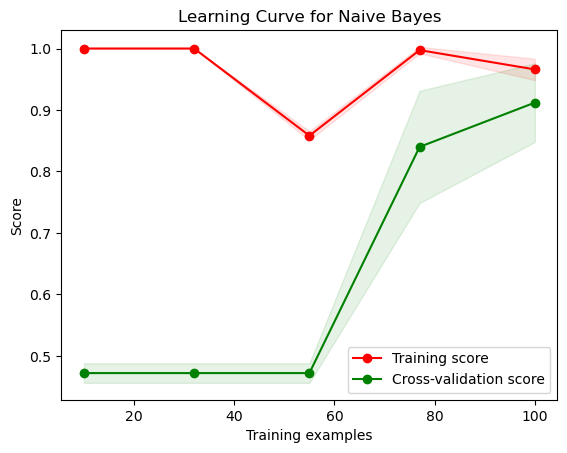

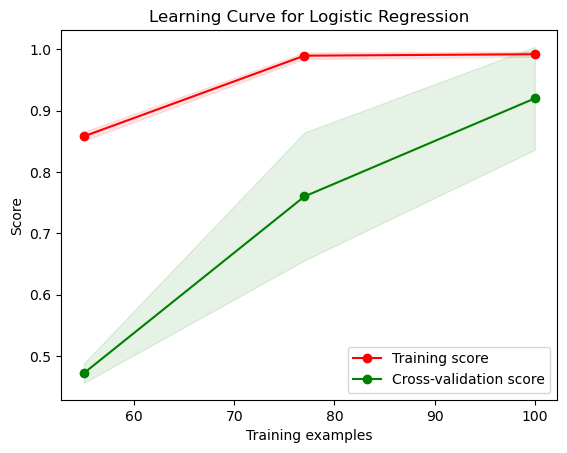

In [1]:


# Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import wikipediaapi
import pandas as pd
import nltk
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Wikipedia API initialization
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    extract_format=wikipediaapi.ExtractFormat.WIKI,
    user_agent="MyWikiApp/1.0 (abhishek.hirve97@gmail.com)"
)

# Function to fetch and clean content from Wikipedia
def fetch_content(title, wiki_wiki):
    page_py = wiki_wiki.page(title)
    content = page_py.text
    return content

# Function to clean text
def clean_text(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

# Medical and non-medical keywords
medical_keywords = ["Healthcare", "Cardiology", "Surgery", "Wellness", "Pharmacy", "Immunology",
                    "Pathology", "Pediatrics", "Oncology", "Neurology", "Dentistry", "Vascular",
                    "Orthopedic", "Dermatology", "Endocrinology", "Gastroenterology", "Pulmonology", "Neurosurgery",
                    "Ophthalmology", "Radiology", "Anesthesiology", "Genetics", "Oncologist", "Hematology",
                    "Immunotherapy", "Pediatrician", "Psychiatry", "Dental", "Anatomy",
                    "Physiology", "Biochemistry", "Nutrition", "Disease", "Disorder", "Ailment", "Injury",
                    "Infectious", "Pandemic", "Nurse", "Doctor", "Alzheimer", "Virus", "Operation",
                    "Medical Science", "Clinical", "Therapeutic", "Remedy", "Vaccination", "Treatment",
                    "Medical Profession", "Medical Care", "Medical Treatment", "Medical Practice",
                    "Medical Examination", "Medical Diagnosis", "Medical Condition", "Medical Research","Kidney","Stone"]

non_medical_keywords = ["Art", "Literature", "Philosophy", "Science", "Technology", "Space",
                        "Environment", "Food", "Cuisine", "Recipes", "Cooking", "History", "Ancient_Civilizations",
                        "Archaeology", "Painting", "Sculpture", "Literary", "Fiction", "Poetry", "Philosopher",
                        "Culinary", "Gastronomy", "Recipe", "Culinary", "History", "Historical", "Architectural",
                        "Archaeological", "Civilization", "Culture", "Engineering", "Astronomy", "Cosmology", "Country", "Industry", "Ocean", "Charger", "Battery", "Music", "Dance", "Painting", "Sculpture", "Artistic", "Novel",
                        "Art", "Creative", "Imagination", "Impressionism", "Improvise", "Fictional", "Lyrical",
                        "Entertainment", "Literary Arts", "Creative Arts", "Humanities", "Social Sciences",
                        "Natural Sciences", "Fine Arts", "Visual Arts", "Performing Arts", "Musicology", "Artistry",
                        "Cultural Studies", "Historiography", "Literary Criticism", "Artistic Expression"]

# Fetching and cleaning content
medical_content_list = [fetch_content(keyword, wiki_wiki) for keyword in medical_keywords]
cleaned_medical_content_list = [clean_text(content) for content in medical_content_list]
non_medical_content_list = [fetch_content(keyword, wiki_wiki) for keyword in non_medical_keywords]
cleaned_non_medical_content_list = [clean_text(content) for content in non_medical_content_list]

# Creating DataFrames
medical_data = {"text": cleaned_medical_content_list, "label": ["medical"] * len(medical_content_list)}
non_medical_data = {"text": cleaned_non_medical_content_list, "label": ["non-medical"] * len(non_medical_content_list)}
df = pd.concat([pd.DataFrame(medical_data), pd.DataFrame(non_medical_data)], ignore_index=True)

# Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])
y = df['label']

# Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# Fitting Naive Bayes Classifier
nb_tfidf_model = MultinomialNB()
nb_tfidf_model.fit(X_train, y_train)

# Predicting the test set results
nb_predictions = nb_tfidf_model.predict(X_test)
# Evaluating the Naive Bayes model
from sklearn.metrics import accuracy_score, classification_report
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Classifier (TF-IDF) - Accuracy:", nb_accuracy)
print("Classification Report:", classification_report(y_test, nb_predictions))

# Fitting Logistic Regression
lr_tfidf_model = LogisticRegression(max_iter=1000)
lr_tfidf_model.fit(X_train, y_train)
# Predicting the test set results for Logistic Regression
lr_predictions = lr_tfidf_model.predict(X_test)
# Evaluating the Logistic Regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression (TF-IDF) - Accuracy:", lr_accuracy)
print("Classification Report:", classification_report(y_test, lr_predictions))

# Dynamic testing function
def dynamic_testing():
    user_input = input("Enter text to classify or 'exit' to quit: ")
    while user_input.lower() != 'exit':
        cleaned_input = clean_text(user_input)
        input_tfidf = tfidf_vectorizer.transform([cleaned_input])
        nb_prediction = nb_tfidf_model.predict(input_tfidf)
        lr_prediction = lr_tfidf_model.predict(input_tfidf)
        print(f"Naive Bayes prediction: {nb_prediction[0]}")
        print(f"Logistic Regression prediction: {lr_prediction[0]}")
        user_input = input("Enter text to classify or 'exit' to quit: ")

# Call the dynamic testing function
dynamic_testing()

# Plotting and other operations remain as before
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plotting learning curve for Naive Bayes
plot_learning_curve(nb_tfidf_model, "Learning Curve for Naive Bayes", X_tfidf, y, cv=5)
plt.show()

# Plotting learning curve for Logistic Regression
plot_learning_curve(lr_tfidf_model, "Learning Curve for Logistic Regression", X_tfidf, y, cv=5)
plt.show()

